# Projet de Data Mining et Machine Learning

## Rendu de:

* Yamine KEBAILI  
* Morgane QUELENNEC

# 1) Collecte de données
## a) Approches automatisées de la collecte de données

Téléchargement d'un dataset sur Kaggle contenant de nombreuses images et un fichier CSV contenant des informations pour ces images

In [14]:
# imports
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import sklearn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import os # accessing directory structure
import csv
import math
import random
import json
import namegenerator

sklearn.show_versions()
from nltk.corpus import stopwords # list of stopwords
from nltk.tokenize import word_tokenize # tokenization function
from nltk.stem import WordNetLemmatizer # lemmatization function
from nltk.stem.porter import PorterStemmer # stemming function
import math


System:
    python: 3.10.6 (main, Nov 14 2022, 16:10:14) [GCC 11.3.0]
executable: /bin/python3
   machine: Linux-5.4.72-microsoft-standard-WSL2-x86_64-with-glibc2.35

Python dependencies:
      sklearn: 1.2.1
          pip: 22.0.2
   setuptools: 66.0.0
        numpy: 1.24.2
        scipy: 1.10.1
       Cython: None
       pandas: 1.5.3
   matplotlib: 3.5.1
       joblib: 1.2.0
threadpoolctl: 3.1.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
         prefix: libopenblas
       filepath: /home/morgane/.local/lib/python3.10/site-packages/numpy.libs/libopenblas64_p-r0-15028c96.3.21.so
        version: 0.3.21
threading_layer: pthreads
   architecture: SkylakeX
    num_threads: 8

       user_api: openmp
   internal_api: openmp
         prefix: libgomp
       filepath: /usr/lib/x86_64-linux-gnu/libgomp.so.1.0.0
        version: None
    num_threads: 8

       user_api: openmp
   internal_api: openmp
         prefix: libgomp
       filepath: 

In [2]:
# Open dataset

# Get header csv
df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
df.sort_values('id', ascending = True )

/tmp/ipykernel_2088/3805032870.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
/tmp/ipykernel_2088/3805032870.py:4: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)


,id,Type1,Type2,Description
0,abomasnow,Grass,Ice,is a dual-type Grass/Ice Pokémon introduced in...
1,abra,Psychic,NaN,is a Psychic-type Pokémon introduced in Genera...
2,absol,Dark,NaN,is a Dark-type Pokémon introduced in Generatio...
3,accelgor,Bug,NaN,is a Bug-type Pokémon introduced in Generation V.
4,aegislash-blade,Steel,Ghost,is a dual-type Steel/Ghost Pokémon introduced ...
...,...,...,...,...
94,charizard,Fire,Flying,Charizard is a dual-type Fire/Flying Pokémon i...
95,charmander,Fire,NaN,Charmander is a Fire-type Pokémon introduced i...
96,charmeleon,Fire,NaN,Charmeleon is a Fire-type Pokémon introduced i...
97,chatot,Normal,Flying,Chatot is a dual-type Normal/Flying Pokémon in...


Chaque ligne correspond à une image. par exemple la ligne contenant le nom de pokémon charizard possède l'image suivante:

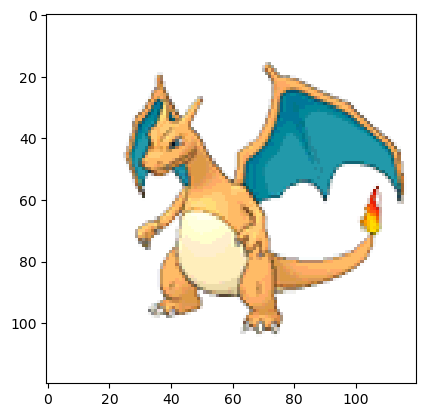

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_name = "charizard"
image_path = f"./dataset/images/{image_name}.png"

if not os.path.exists(image_path):
    print(f"Error: The file {image_path} does not exist.")
else:
    try:
        img = mpimg.imread(image_path)
        imgplot = plt.imshow(img)
        plt.show()
    except Exception as e:
        print(f"Error: Unable to read the image {image_path}. {e}")

Les informations correspondant à cette image sont les suivantes: 

In [4]:
df.loc[df['id'].isin(["charizard"])]

,id,Type1,Type2,Description
94,charizard,Fire,Flying,Charizard is a dual-type Fire/Flying Pokémon i...


Pour répondre aux questions concernant le projet: 

### Approches automatisées de la collecte de données

Cette méthode a été choisie pour sa rapidité d'exécution et parce que le projet disposait déjà d'une grande quantité de données.   


### Utilisation d'images sous licence libre

Nous avons utilisé des images sous licence libre pour ce projet. Les images sont disponibles sur https://www.kaggle.com/dataset/vishalsubbiah/pokemon-images-and-types et peuvent être utilisées sans restriction.

### Stockage et gestion des images et des métadonnées associées

Les images utilisées pour le projet sont stockées dans le fichier zip que nous avons téléchargé. Il est nécessaire de dézipper le fichier (dataset.zip) pour y accéder. Les informations de métadonnées associées aux images sont stockées dans un fichier CSV séparé (dataset/pokemon.csv).

### Approches automatisées de l'étiquetage / Stockage et gestion des étiquettes et des annotations des images

Étant donné que le contenu de notre jeu de données téléchargé est déjà annoté, il n'est pas nécessaire de mettre en place des étiquettes supplémentaires. Nous pouvons donc nous concentrer sur les autres aspects du projet.


# Méthode par Text-Mining

## Objectif :

L'objectif de cette application est de proposer des images à l'utilisateur en fonction de sa sélection d'une ou plusieurs images. Pour cela, nous avons mis en place une première méthode basée sur le text-mining. Cette méthode consiste à utiliser la description de l'image sélectionnée pour effectuer une recherche de similarité sur toutes les descriptions des autres images disponibles.


### Sources :


* https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
* http://www.nltk.org/

## Plan du document :

1. **Principe de l'algorithme**
    1. **Traitement du corpus**
        1. **Transformation des descriptions**
        1. **Présentation des différentes étapes avec exemples**
    2. **Traitement d'une recherche**
        1. **Vectorisation de la requête**
        1. **Calcul de similarité**
1. **Exécution de l'application**

## 1. Principe de l'algorithme

Le principe de cet algorithme repose sur l'analyse de la fréquence des mots dans les textes et se déroule en deux étapes distinctes :

Une première étape préliminaire de traitement du corpus, qui a pour objectif de créer une matrice représentative de ce dernier.
La phase de recherche proprement dite consiste à représenter la requête de l'utilisateur (c'est-à-dire la description de l'image sélectionnée par l'utilisateur) de manière vectorielle et à trouver la ligne de la matrice du corpus (et donc des autres images) qui correspond le mieux à cette requête.

### A. Traitement du corpus

Le but est à partir du corpus constitué de description d'image sous la forme d'une chaîne de caractère de construire une matrice représentatrice de ce dernier. 

Chaque ligne de la matrice représente une description, et chaque colonne représente un mot présent dans ce corpus. La valeur dans la matrice à la position (i, j) correspond à l'importance du mot j pour le texte i par rapport aux autres descriptions.

Cette valeur permet de choisir parmi les descriptions. L'importance du mot doit être comprise comme l'importance dans le texte lui-même (répétition du mot dans le texte) et dans ce texte par rapport aux autres descriptions (mot présent dans la description mais peu dans le reste du corpus).

#### a. Transformation des descriptions

Pour construire la matrice, les descriptions sont d'abord "découpées" en listes de mots (tokenisation).

Ensuite, les mots trop courants (stopwords), considérés comme ayant peu de sens, sont éliminés (ce peut également être la ponctuation).

Ensuite, les mots sont transformés pour rassembler ceux qui ont un sens identique ou proche, en utilisant deux techniques :

Lemmatisation : regrouper les mots sous une même forme de mot-clé
Stemming : regrouper les mots sous un même radical
La bibliothèque python nltk (Natural Language ToolKit) est utilisée pour cela. La fonction "split" est ainsi définie :



#### b. Présentation des différentes étapes de scoring avec exemples

Pour cette méthode, nous allons travailler uniquement à l'aide des descriptions des images

In [5]:
# Delete unless columns
df = df.drop(['Type1', 'Type2'], axis=1)
df

,id,Description
0,abomasnow,is a dual-type Grass/Ice Pokémon introduced in...
1,abra,is a Psychic-type Pokémon introduced in Genera...
2,absol,is a Dark-type Pokémon introduced in Generatio...
3,accelgor,is a Bug-type Pokémon introduced in Generation V.
4,aegislash-blade,is a dual-type Steel/Ghost Pokémon introduced ...
...,...,...
93,chansey,Chansey is a Normal-type Pokémon introduced in...
94,charizard,Charizard is a dual-type Fire/Flying Pokémon i...
95,charmander,Charmander is a Fire-type Pokémon introduced i...
96,charmeleon,Charmeleon is a Fire-type Pokémon introduced i...


In [7]:
!sudo apt install python3-nltk

[sudo] password for morgane: 


In [8]:
!python3 -m nltk.downloader stopwords

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/morgane/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
from nltk.corpus import stopwords # list of words not taken into account
from nltk.tokenize import word_tokenize # tokenization function
from nltk.stem import WordNetLemmatizer # lemmatization function
from nltk.stem.porter import PorterStemmer # stemming function

# "Hyperparameters"
stop_words = set(stopwords.words('english'))
# We can shape the list of words not taken into account
stop_words.update(stop_words,{'.',',','!','?','\'s', '<', '>', ':', ';', '/', '(', ')', '-', '_', '{', '}', '--', '...'})
lmtzr=WordNetLemmatizer()
ps = PorterStemmer()


def split(Description):
    """ Function that takes a text (an image description) as input and returns
    the list of its words that have been filtered and transformed: lemmatized and stemmed"""

    # Tokenization ************************************************************
    # Splitting the text into words (words is a list of strings)
    words = word_tokenize(str(Description))

    # Stop-words **************************************************************
    # Filtering words: we remove from words those that are contained in 
    # stop_words because they are supposed to have too little meaning.
    # (common words, linking words, punctuation)
    words_clean = []
    for word in words:
        if word.lower() not in stop_words:
            words_clean.append(word)

    # Lemmatization *************************************************************
    # Transforming words into a single keyword (lemma) representing them. 
    # Ex: divided, dividing, divided, divides -> divide
    words_lemmed = [lmtzr.lemmatize(word) for word in words_clean]
            
    # Stemming ****************************************************************
    # Transforming words into a single root representing them. 
    # Ex: divided, dividing, divided, divides -> divid
    words_stemmed = [ps.stem(word) for word in words_lemmed]

    return words_stemmed


In [28]:
!sudo pip install -U nltk

[sudo] password for morgane: 

Exemple de la fonction split

In [19]:
# split the following line: 
keep_line = df.loc[df['id'].isin(["abra"])]
keep_line

,id,Description
1,abra,is a Psychic-type Pokémon introduced in Genera...


In [20]:
# We then obtain:
description_test = keep_line['Description'][1]
try:
    words = description_test.split()
except IndexError:
    print("Error: Index out of range")
else:
    print(words)


['is', 'a', 'Psychic-type', 'Pokémon', 'introduced', 'in', 'Generation', 'I.']


Nous pouvons alors identifier les "tokens" (mots distincts) du corpus, qui constituent ainsi une base pour représenter les descriptions sous forme vectorielle

Tachons à présent de transformer nos descriptions en matrice via les différents fonctions suivantes:

In [21]:
def count(words, wordbase):
    """Function that takes as input a text that has been split into words and the list 
    of tokens in the corpus, and returns the vector containing the number of occurrences 
    in the text of each token in the corpus."""
    
    vector = [0 for i in range(len(wordbase))]
    for i in range(len(wordbase)):
        if wordbase[i] in words:
            vector[i] += 1
    return vector


def preliminaryWork(corpus):
    """Function that takes as input a corpus of descriptions in the form of a 
    list of strings, and returns the list of words used as a basis for representing 
    the texts that make it up, and the matrix of these texts in this basis, 
    with the coordinates calculated using the TF-IDF formula."""
    
    # Splitting, sorting and transforming texts (see split function)
    corpus_words = []
    for i in range(len(corpus)):
        corpus_words.append(split(corpus[i]))
        
    # Constructing the list of words in the corpus (intersection of the words in the 
    # texts). Wordset is an object of type set, which is useful because it allows 
    # for set intersection, but it is not ordered. We therefore build wordbase 
    # from the words in wordset so that we can associate 1 word with 1 coordinate.
    wordset = set()
    for words in corpus_words:
        wordset = wordset.union(set(words))
    wordbase = [word for word in wordset]
    
    # Constructing the matrix representing the texts in the wordbase. We initialize 
    # it with the vectors whose coordinates are the raw counts.
    matrix = []
    for words in corpus_words:
        matrix.append(count(words, wordbase))
        
    # Calculating the number of texts that contain each word
    nt = [0 for m in range(len(wordbase))]
    for m in range(len(wordbase)):
        for line in matrix:
            if line[m] > 0:
                nt[m] += 1
    
    # Calculating the tf-idf of each word in each text
    # TF(word in a text) = log(1 + number of occurrences of this word in this text)
    # IDF(word) = log(total number of texts / number of texts containing this word)
    # TF-IDF(word in a text) = TF(word in a text) * IDF(word)
    for t in range(len(matrix)):
        for m in range(len(wordbase)):
            matrix[t][m] = math.log(1 + matrix[t][m]) * math.log(len(corpus) / nt[m])
            
    return (matrix, wordbase)


In [13]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/morgane/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Exemple: Prenons les 4 premières lignes de pokemon.csv

In [12]:
num_description_test = 4
for i in range(num_description_test):
    print(f"Description {i}: {df['Description'][i]}")

(matrix, wordbase) = preliminaryWork(df['Description'][:num_description_test])


Description 0: is a dual-type Grass/Ice Pokémon introduced in Generation IV.
Description 1: is a Psychic-type Pokémon introduced in Generation I.
Description 2: is a Dark-type Pokémon introduced in Generation III.
Description 3: is a Bug-type Pokémon introduced in Generation V.


Affichons la matrice 

In [22]:
df2 = pd.DataFrame(np.array(matrix),columns=wordbase,index=df['id'][:num_description_test])

num_description_test= 4
counter = 0

df2

,dual-typ,iv,v,grass/ic,psychic-typ,iii,bug-typ,gener,introduc,pokémon,dark-typ
id,,,,,,,,,,,
abomasnow,0.960906,0.960906,0.000000,0.960906,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
abra,0.000000,0.000000,0.000000,0.000000,0.960906,0.000000,0.000000,0.0,0.0,0.0,0.000000
absol,0.000000,0.000000,0.000000,0.000000,0.000000,0.960906,0.000000,0.0,0.0,0.0,0.960906
accelgor,0.000000,0.000000,0.960906,0.000000,0.000000,0.000000,0.960906,0.0,0.0,0.0,0.000000


Si l'on considère le mot "dark-typ" qui n'apparaît que dans la description 3, il obtient un score de 0,960906 (proche de 1), ce qui démontre son importance non seulement dans sa propre description, mais aussi par rapport aux autres descriptions.

## B. Traitement d'une recherche

Après avoir construit la matrice représentative du corpus, on souhaitera traiter les demandes de l'utilisateur. Pour ce faire, nous allons procéder en deux étapes :

* tout d'abord, nous allons vectoriser la demande de l'utilisateur, de la même manière que nous avons vectorisé les descriptions du corpus 
* ensuite, nous allons identifier la description la plus similaire à la demande en calculant la similarité entre la demande et chaque description.

### a. Vectorisation de la requête

Nous souhaitons transformer la requête en un vecteur. Pour que les vecteurs de la requête et des descriptions soient comparables et que les calculs aient une signification, il est nécessaire d'appliquer le même traitement à la requête qu'à celui appliqué aux descriptions. Ainsi, nous sommes assurés que les coordonnées du vecteur de la requête portent sur les bons tokens.

Pour assigner les coordonnées du vecteur, on attribue simplement à chaque token sa fréquence dans la requête.

Afin de réaliser cette opération, les fonctions "split" et "count" utilisées pour le traitement du corpus sont réutilisées pour créer la fonction "vectorisation" suivante :

### Dans notre cas, l'utiliseur possède les données suivantes:

In [23]:
# Loading our users
import json

with open('user_demo.json') as json_file:
    data = json.load(json_file)

print(f"data: {data}")

data: {'users': [{'name': 'yamine', 'name_photo_liked': ['bronzor', 'arbok', 'cacturne', 'boldore']}, {'name': 'morgane', 'name_photo_liked': ['clefable', 'combee', 'corsola', 'dragonair']}, {'name': 'emre', 'name_photo_liked': ['crustle', 'duskull']}, {'name': 'abou', 'name_photo_liked': ['corsola', 'beldum', 'archen']}]}


Par exemple l'utilisateur Yamine a liké les photos suivantes:

Pokemons liked by Yamine: ['bronzor', 'arbok', 'cacturne', 'boldore']


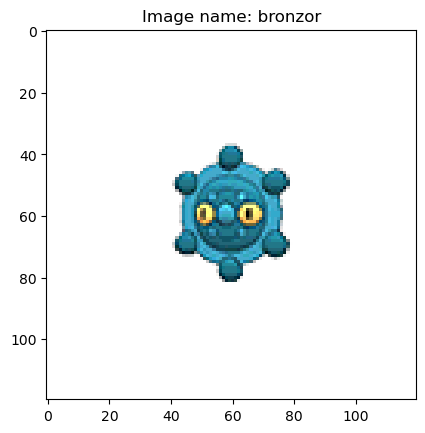

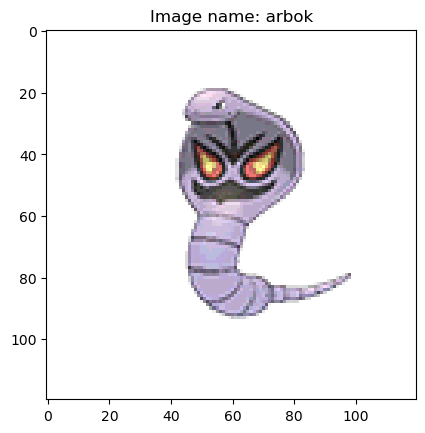

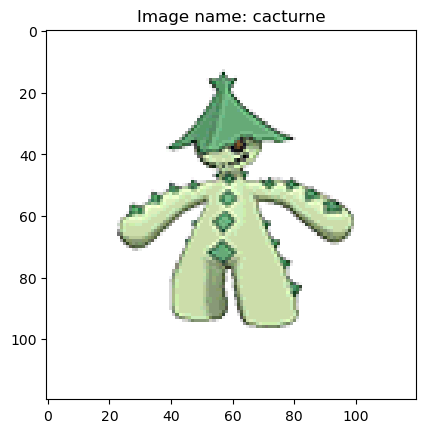

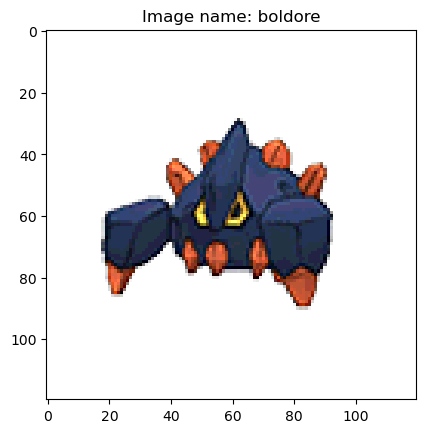

In [26]:
def find_user(user_dict: dict, name: str):
    """Find user by his name"""
    user_profile = user_dict.get(name)
    if user_profile is None:
        raise ValueError(f"User with name {name} not found in user list")
    return user_profile

# Load user data from JSON file
with open('user_demo.json') as json_file:
    data = json.load(json_file)

# Create a dictionary of user profiles keyed by user name
user_dict = {user['name']: user for user in data['users']}

# Find user profile for "yamine"
try:
    user_profile = find_user(user_dict, "yamine")
except ValueError as e:
    print(e)
else:
    # Get list of photos liked by "yamine"
    photo_liked_by_yamine = user_profile.get('name_photo_liked')
    print(f"Pokemons liked by Yamine: {photo_liked_by_yamine}")

    # Display images for each photo liked by "yamine"
    for image in photo_liked_by_yamine:
        try:
            # Load image file
            img_path = os.path.join("./dataset/images", f"{image}.png")
            img = mpimg.imread(img_path)

            # Display image and its name
            plt.imshow(img)
            plt.title(f"Image name: {image}")
            plt.show()
        except Exception as e:
            print(f"Error loading image {image}: {e}")


Nous allons récupérer les descriptions liées à ces photos

In [27]:
keep_df = df.loc[df['id'].isin(photo_liked_by_yamine)]
keep_df

,id,Description
17,arbok,is a Poison-type Pokémon introduced in Generat...
61,boldore,is a Rock-type Pokémon introduced in Generatio...
70,bronzor,is a dual-type Steel/Psychic Pokémon introduce...
81,cacturne,is a dual-type Grass/Dark Pokémon introduced i...


Nous utiliserons ces dernières comme requêtes pour recommander 4 photos à l'utilisateur, liées à l'image précédente.

In [29]:
# Retrieving the description of the last image
# We obtain:

description_test = keep_df['Description'].values[int(len(keep_df))-1]
print(f"description_test: {description_test}")

description_test: is a dual-type Grass/Dark Pokémon introduced in Generation III.


In [31]:
def vectorisation(text, wordbase):
    """Transforms a text string into a vector representation in the corpus base.
    
    Given a text string and a list of words in the corpus, this function counts 
    the occurrences of each word in the text and returns a vector whose entries 
    correspond to the word frequencies.
    
    Args:
        text (str): The input text to be transformed into a vector.
        wordbase (list of str): The list of words in the corpus used as a reference 
            for the vector representation.
    
    Returns:
        list of int: The vector representation of the input text in the corpus base.
    """
    return count(split(text), wordbase)


### b. Calcul de similarité

Pour évaluer la proximité de chaque description avec la requête, nous allons calculer un score pour chacune d'elles. Nous allons utiliser la similarité cosinus pour mesurer cette proximité. Pour chaque vecteur représentant un texte dans le corpus, c'est-à-dire pour chaque ligne de la matrice, nous allons calculer sa similarité avec le vecteur représentant la requête. La formule de similarité cosinus est la suivante :<br>
Sim(t) = <R, T> / ( ||R|| * ||T|| )<br>
Ici, T représente le vecteur de la description t (= la ligne M[t]), R représente le vecteur de la requête, <,> désigne le produit scalaire et || || la norme associée. Nous allons calculer cette valeur pour chaque description du corpus, puis sélectionner les meilleures réponses en fonction d'un nombre arbitraire de résultats souhaités. Les fonctions suivantes ont donc été définies :

Nous allons lui recommander 3 images par rapport à l'image précédente

In [34]:
import math
nbTop =  3

def scal(v1, v2):
    """ Function that calculates the dot product between two vectors of the same size and returns it."""
    scal = 0
    for i in range(len(v1)):
        scal += v1[i] * v2[i]
    return (scal)
  
    
def norm(v):
    """ Function that calculates the L2 norm of a vector and returns it."""
    n = math.sqrt(scal(v, v))
    if (n == 0):
        n = 1
    return (n)


def iMax(similarity):
    """ Function that returns the index of the maximum value in the list passed as a parameter."""
    imax = 0
    for i in range(1,len(similarity)):
        if (similarity[i] > similarity[imax]):
            imax = i
    return (imax)


def top(similarity, nbTop):
    """ Function that returns the list of indices of the nbTop largest elements
    in the list passed as a parameter (similarity), in descending order."""
    order = []
    cptTop = 0
    imax = iMax(similarity)
    while (similarity[imax] >= 0 and cptTop < nbTop):
        order.append(imax)
        # We set to -1 the element whose index we just took to no longer consider it
        similarity[imax] = -1
        cptTop += 1
        imax = iMax(similarity)
    return (order)


def research(request, matrix, wordbase):
    """ Function that takes a request as a string, the representative matrix of the corpus,
    and the list of tokens as parameters, and returns the list of indices of the descriptions
    in the corpus that most closely match the request. """
    # Vectorization of the request
    vector = vectorisation(request, wordbase)
    # Calculation of the list of similarity scores for each vector in the matrix
    similarity = []
    for v2 in matrix:
        similarity.append(scal(vector, v2) / (norm(vector) * norm(v2)))
    # We return the best results
    return (top(similarity, nbTop))


def printResearch(order, corpus):
    """ Function that, given the results of a query (list of indices) and the corpus used,
    displays the texts in the console, the most representative one first"""
    print("*\t*\t*\t*\t*\t*\t*\t*")
    print("*\t*\tResearch Result\t*\t*")
    print("*\t*\t*\t*\t*\t*\t*\t*\n\n")
    for i in range(len(order)):
        print("*\t*\t*\t*\t*\t*\t*\t*")
        print("*\t*\tNumber" + str(i + 1) + " - Image " + str(order[i]) + "\t*\t*\t*")
        print("*\t*\t*\t*\t*\t*\t*\t*\n\n")
        print(corpus[order[i]])
        printImage(str(order[i]))

    
def printImage(rows: str):
    """Displays the image corresponding to the found row"""
    current_id = df.iloc[int(rows)]["id"]
    print(f"current_id: {current_id}")
    img = mpimg.imread(f"dataset/images/{current_id}.png")
    imgplot = plt.imshow(img)
    plt.show()

## 2. Exécution de l'application

Ouverture des données

In [35]:
# Open dataset

# Get header csv
df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
df.sort_values('id', ascending = True )
# Delete unless columns
df = df.drop(['Type1', 'Type2'], axis=1)
df

/tmp/ipykernel_2088/3204077437.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
/tmp/ipykernel_2088/3204077437.py:4: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)


,id,Description
0,abomasnow,is a dual-type Grass/Ice Pokémon introduced in...
1,abra,is a Psychic-type Pokémon introduced in Genera...
2,absol,is a Dark-type Pokémon introduced in Generatio...
3,accelgor,is a Bug-type Pokémon introduced in Generation V.
4,aegislash-blade,is a dual-type Steel/Ghost Pokémon introduced ...
...,...,...
93,chansey,Chansey is a Normal-type Pokémon introduced in...
94,charizard,Charizard is a dual-type Fire/Flying Pokémon i...
95,charmander,Charmander is a Fire-type Pokémon introduced i...
96,charmeleon,Charmeleon is a Fire-type Pokémon introduced i...


Rappelons les photos likées par l'utilisateur appelé "yamine"

Pokemons liked by Yamine: ['bronzor', 'arbok', 'cacturne', 'boldore']


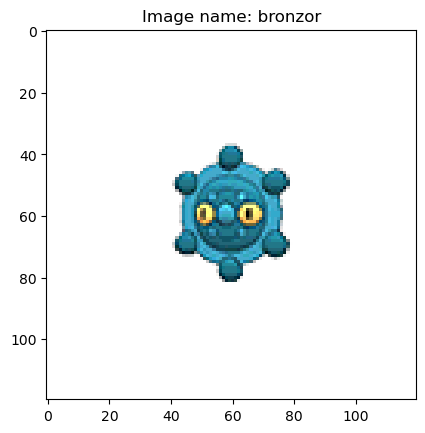

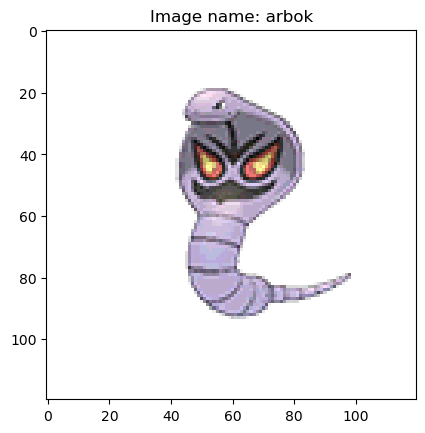

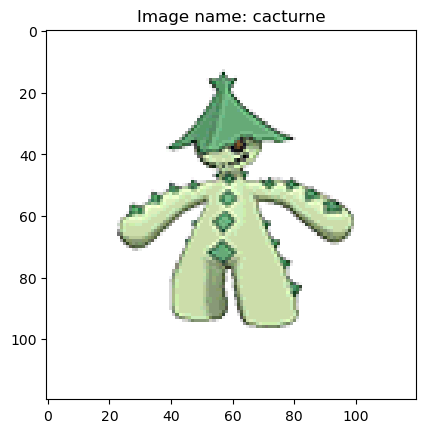

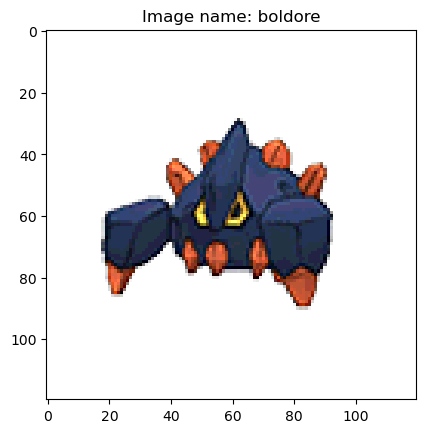

In [36]:
def find_user(user_dict: dict, name: str):
    """Find user by his name"""
    user_profile = user_dict.get(name)
    if user_profile is None:
        raise ValueError(f"User with name {name} not found in user list")
    return user_profile

# Load user data from JSON file
with open('user_demo.json') as json_file:
    data = json.load(json_file)

# Create a dictionary of user profiles keyed by user name
user_dict = {user['name']: user for user in data['users']}

# Find user profile for "yamine"
try:
    user_profile = find_user(user_dict, "yamine")
except ValueError as e:
    print(e)
else:
    # Get list of photos liked by "yamine"
    photo_liked_by_yamine = user_profile.get('name_photo_liked')
    print(f"Pokemons liked by Yamine: {photo_liked_by_yamine}")

    # Display images for each photo liked by "yamine"
    for image in photo_liked_by_yamine:
        try:
            # Load image file
            img_path = os.path.join("./dataset/images", f"{image}.png")
            img = mpimg.imread(img_path)

            # Display image and its name
            plt.imshow(img)
            plt.title(f"Image name: {image}")
            plt.show()
        except Exception as e:
            print(f"Error loading image {image}: {e}")


In [37]:
# Retreving relevant rows
keep_df = df.loc[df['id'].isin(photo_liked_by_yamine)]
print(f"row yamine liked: {keep_df}\n")

# Removing the relevant rows from the dataset
for id_photo in photo_liked_by_yamine:
    indexNames = df[df['id'] == id_photo].index
    # Delete these row indexes from dataFrame
    df.drop(indexNames , inplace=True)
    
print(f"df with rows deletes: {df}")

row yamine liked:           id                                        Description
17     arbok  is a Poison-type Pokémon introduced in Generat...
61   boldore  is a Rock-type Pokémon introduced in Generatio...
70   bronzor  is a dual-type Steel/Psychic Pokémon introduce...
81  cacturne  is a dual-type Grass/Dark Pokémon introduced i...

df with rows deletes:                  id                                        Description
0         abomasnow  is a dual-type Grass/Ice Pokémon introduced in...
1              abra  is a Psychic-type Pokémon introduced in Genera...
2             absol  is a Dark-type Pokémon introduced in Generatio...
3          accelgor  is a Bug-type Pokémon introduced in Generation V.
4   aegislash-blade  is a dual-type Steel/Ghost Pokémon introduced ...
..              ...                                                ...
93          chansey  Chansey is a Normal-type Pokémon introduced in...
94        charizard  Charizard is a dual-type Fire/Flying Pokémon i...


In [39]:
# Number of lines to keep
line_number = len(df)//8 #  Voluntary choice to avoid array size problems
line_number

11

In [40]:
try:
        (matrix, wordbase) = preliminaryWork(df['Description'][:line_number])
        result = pd.DataFrame(np.array(matrix),columns=wordbase,index=[df['id'][:line_number]])
except KeyError:
        pass
result

,dual-typ,iv,grass/ic,psychic-typ,normal-typ,bug-typ,ii,steel/ghost,dragon/fli,pokémon,steel/rock,dark-typ,v,vi,iii,water-typ,gener,rock/fli,introduc
id,,,,,,,,,,,,,,,,,,,
abomasnow,0.546517,1.662094,1.662094,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
abra,0.000000,0.000000,0.000000,1.181641,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
absol,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.662094,0.000000,0.000000,0.900594,0.000000,0.0,0.000000,0.0
accelgor,0.000000,0.000000,0.000000,0.000000,0.000000,1.662094,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.181641,0.000000,0.000000,0.000000,0.0,0.000000,0.0
aegislash-blade,0.546517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.662094,0.000000,0.0,0.000000,0.000000,0.000000,1.662094,0.000000,0.000000,0.0,0.000000,0.0
aerodactyl,0.546517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.662094,0.0
aggron,0.546517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.662094,0.000000,0.000000,0.000000,0.900594,0.000000,0.0,0.000000,0.0
aipom,0.000000,0.000000,0.000000,0.000000,1.662094,0.000000,1.662094,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
alakazam,0.000000,0.000000,0.000000,1.181641,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0


Créons la liste des images à recommander


 Recommandation pour Yamine:


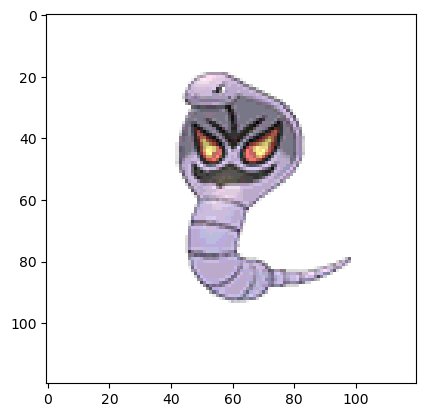

order: [0, 1, 2]
*	*	*	*	*	*	*	*
*	*	Research Result	*	*
*	*	*	*	*	*	*	*


*	*	*	*	*	*	*	*
*	*	Number1 - Image 0	*	*	*
*	*	*	*	*	*	*	*


is a dual-type Grass/Ice Pokémon introduced in Generation IV.
current_id: abomasnow


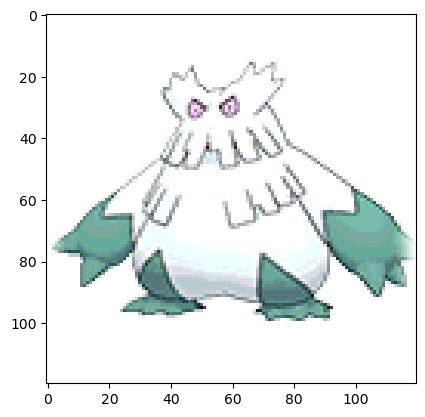

*	*	*	*	*	*	*	*
*	*	Number2 - Image 1	*	*	*
*	*	*	*	*	*	*	*


is a Psychic-type Pokémon introduced in Generation I.
current_id: abra


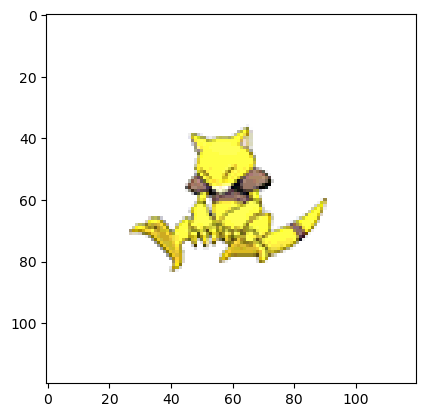

*	*	*	*	*	*	*	*
*	*	Number3 - Image 2	*	*	*
*	*	*	*	*	*	*	*


is a Dark-type Pokémon introduced in Generation III.
current_id: absol


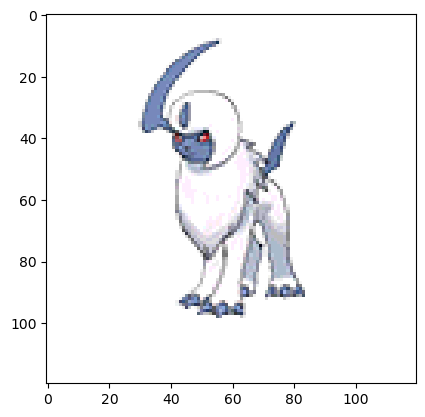


 Recommandation pour Yamine:


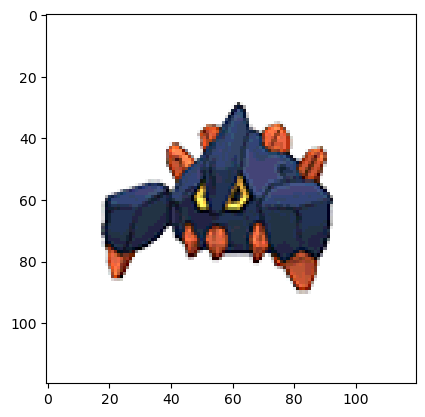

order: [3, 9, 0]
*	*	*	*	*	*	*	*
*	*	Research Result	*	*
*	*	*	*	*	*	*	*


*	*	*	*	*	*	*	*
*	*	Number1 - Image 3	*	*	*
*	*	*	*	*	*	*	*


is a Bug-type Pokémon introduced in Generation V.
current_id: accelgor


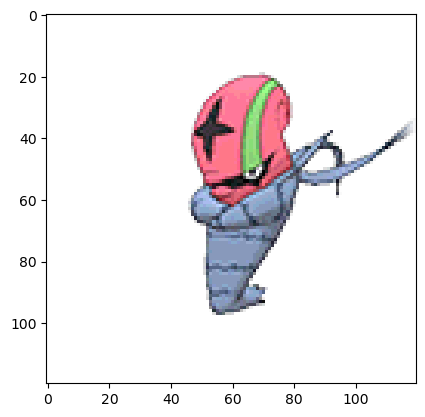

*	*	*	*	*	*	*	*
*	*	Number2 - Image 9	*	*	*
*	*	*	*	*	*	*	*


is a Water-type Pokémon introduced in Generation V.
current_id: alomomola


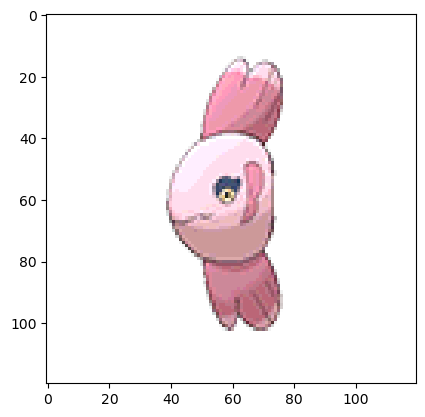

*	*	*	*	*	*	*	*
*	*	Number3 - Image 0	*	*	*
*	*	*	*	*	*	*	*


is a dual-type Grass/Ice Pokémon introduced in Generation IV.
current_id: abomasnow


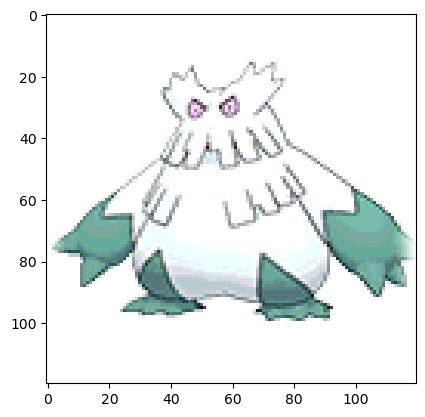


 Recommandation pour Yamine:


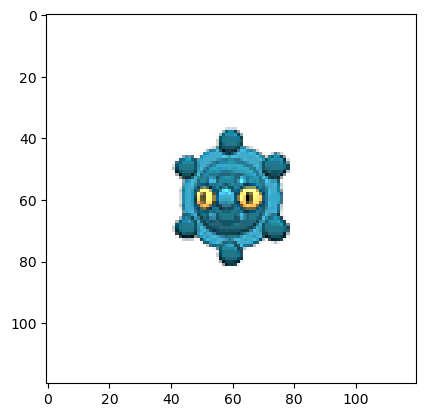

order: [0, 5, 6]
*	*	*	*	*	*	*	*
*	*	Research Result	*	*
*	*	*	*	*	*	*	*


*	*	*	*	*	*	*	*
*	*	Number1 - Image 0	*	*	*
*	*	*	*	*	*	*	*


is a dual-type Grass/Ice Pokémon introduced in Generation IV.
current_id: abomasnow


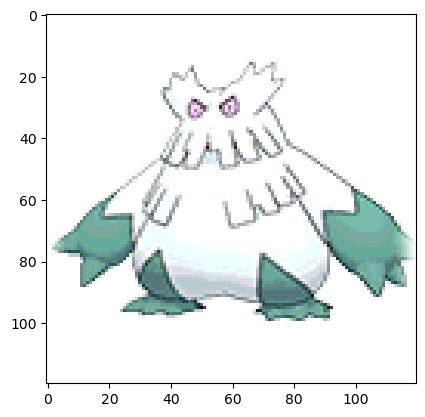

*	*	*	*	*	*	*	*
*	*	Number2 - Image 5	*	*	*
*	*	*	*	*	*	*	*


is a dual-type Rock/Flying Pokémon introduced in Generation I.
current_id: aerodactyl


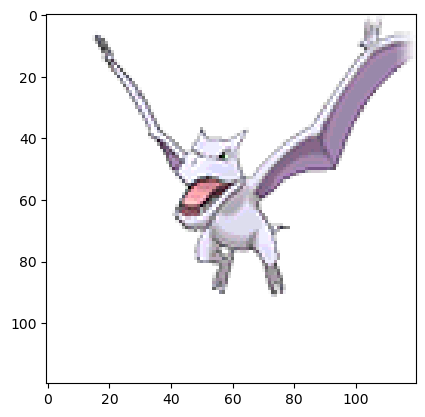

*	*	*	*	*	*	*	*
*	*	Number3 - Image 6	*	*	*
*	*	*	*	*	*	*	*


is a dual-type Steel/Rock Pokémon introduced in Generation III.
current_id: aggron


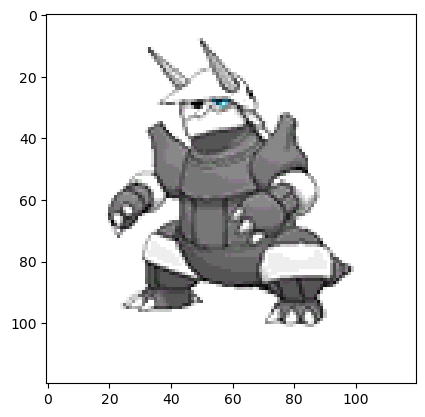


 Recommandation pour Yamine:


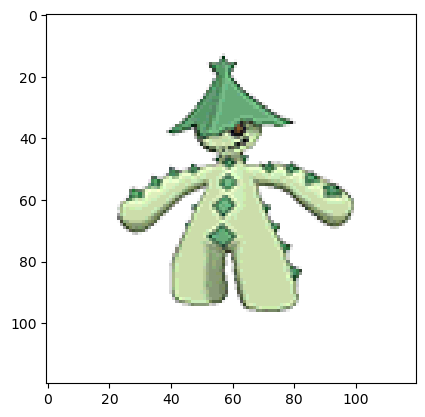

order: [6, 10, 2]
*	*	*	*	*	*	*	*
*	*	Research Result	*	*
*	*	*	*	*	*	*	*


*	*	*	*	*	*	*	*
*	*	Number1 - Image 6	*	*	*
*	*	*	*	*	*	*	*


is a dual-type Steel/Rock Pokémon introduced in Generation III.
current_id: aggron


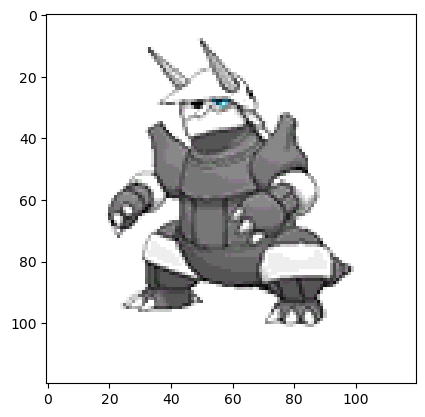

*	*	*	*	*	*	*	*
*	*	Number2 - Image 10	*	*	*
*	*	*	*	*	*	*	*


is a dual-type Dragon/Flying Pokémon introduced in Generation III.
current_id: altaria


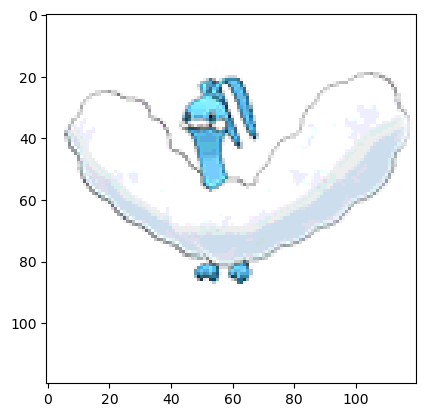

*	*	*	*	*	*	*	*
*	*	Number3 - Image 2	*	*	*
*	*	*	*	*	*	*	*


is a Dark-type Pokémon introduced in Generation III.
current_id: absol


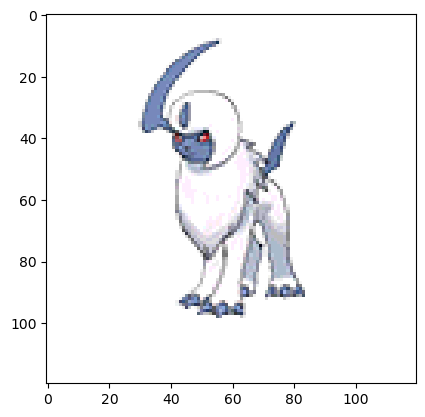

In [41]:
# Preload images
images = {}
for row in keep_df.itertuples():
    img = mpimg.imread(f"dataset/images/{row.id}.png")
    images[row.id] = img

# Create a new dataframe with the relevant rows
line_condition = keep_df['id'].isin(photo_liked_by_yamine)
new_df = keep_df[line_condition]

# Iterate over the rows in the new dataframe
for row in new_df.itertuples():
    # Get the relevant information from the row
    current_description = row.Description
    current_id = row.id
    
    # Display the image
    print("\n Recommandation pour Yamine:")
    imgplot = plt.imshow(images[current_id])
    plt.show()
    
    # Recherche
    order = research(current_description, matrix, wordbase)
    print(f"order: {order}")
    printResearch(order, df['Description'])


Ainsi pour chaque image liké par l'utilisateur yamine, nous avons des images à lui recommander

## 3. Application

/tmp/ipykernel_2088/3368318327.py:321: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
/tmp/ipykernel_2088/3368318327.py:321: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
/tmp/ipykernel_2088/3368318327.py:321: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
/tmp/ipykernel_2088/3368318327.py:321: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



user_list_position: 3
L'utlisateur: snippy-celadon-tuatara

 a aimé la photo


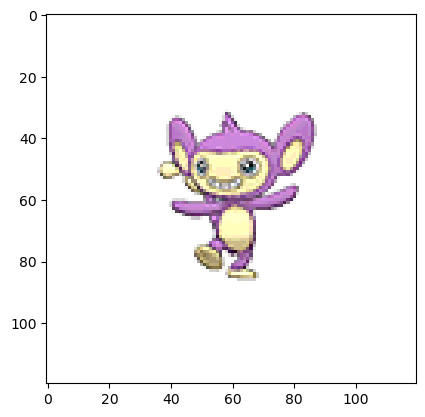


 Le programme lui recommande: 


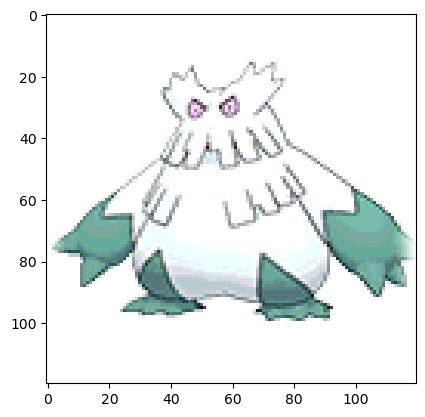

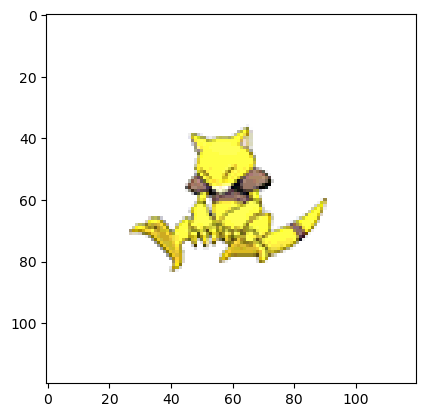

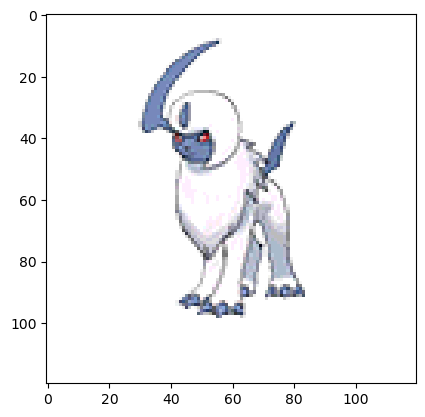


 a aimé la photo


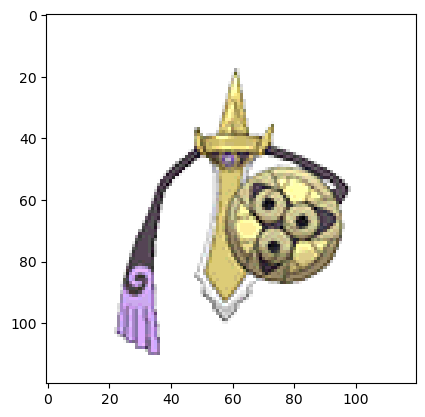


 Le programme lui recommande: 


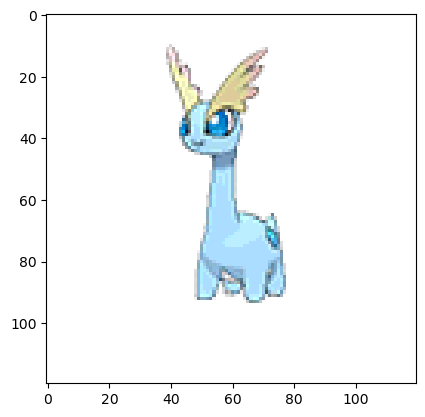

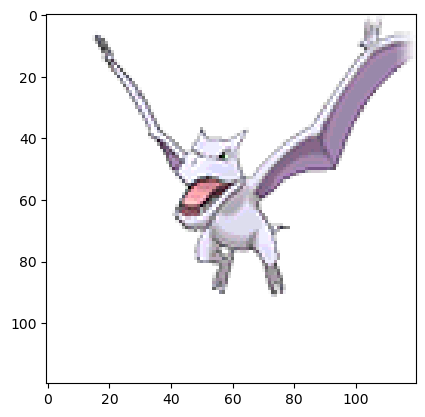

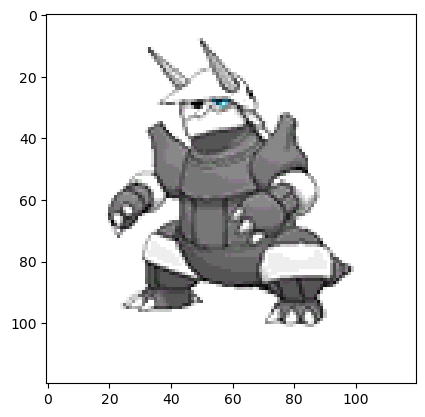

In [45]:
# "Hyperparameters"
stop_words = set(stopwords.words('english'))
# We can shape the list of words not taken into account
stop_words.update(stop_words,{'.',',','!','?','\'s', '<', '>', ':', ';', '/', '(', ')', '-', '_', '{', '}', '--', '...'})
lmtzr=WordNetLemmatizer()
ps = PorterStemmer()
# Total number of users
user_max = 4
# Number of recommendations per image
nbTop =  4
# Line reduction coefficient
coeff = 8

def split(Description):
    """ Function that takes a text (an image description) as input and returns
    the list of its words that have been filtered and transformed: lemmatized and stemmed"""

    # Tokenization ************************************************************
    # Splitting the text into words (words is a list of strings)
    words = word_tokenize(str(Description))

    # Stop-words **************************************************************
    # Filtering words: we remove from words those that are contained in 
    # stop_words because they are supposed to have too little meaning.
    # (common words, linking words, punctuation)
    words_clean = []
    for word in words:
        if word.lower() not in stop_words:
            words_clean.append(word)

    # Lemmatization *************************************************************
    # Transforming words into a single keyword (lemma) representing them. 
    # Ex: divided, dividing, divided, divides -> divide
    words_lemmed = [lmtzr.lemmatize(word) for word in words_clean]
            
    # Stemming ****************************************************************
    # Transforming words into a single root representing them. 
    # Ex: divided, dividing, divided, divides -> divid
    words_stemmed = [ps.stem(word) for word in words_lemmed]

    return words_stemmed


def count(words, wordbase):
    """Function that takes as input a text that has been split into words and the list 
    of tokens in the corpus, and returns the vector containing the number of occurrences 
    in the text of each token in the corpus."""
    
    vector = [0 for i in range(len(wordbase))]
    for i in range(len(wordbase)):
        if wordbase[i] in words:
            vector[i] += 1
    return vector


def preliminaryWork(corpus):
    """Function that takes as input a corpus of descriptions in the form of a 
    list of strings, and returns the list of words used as a basis for representing 
    the texts that make it up, and the matrix of these texts in this basis, 
    with the coordinates calculated using the TF-IDF formula."""
    
    # Splitting, sorting and transforming texts (see split function)
    corpus_words = []
    for i in range(len(corpus)):
        corpus_words.append(split(corpus[i]))
        
    # Constructing the list of words in the corpus (intersection of the words in the 
    # texts). Wordset is an object of type set, which is useful because it allows 
    # for set intersection, but it is not ordered. We therefore build wordbase 
    # from the words in wordset so that we can associate 1 word with 1 coordinate.
    wordset = set()
    for words in corpus_words:
        wordset = wordset.union(set(words))
    wordbase = [word for word in wordset]
    
    # Constructing the matrix representing the texts in the wordbase. We initialize 
    # it with the vectors whose coordinates are the raw counts.
    matrix = []
    for words in corpus_words:
        matrix.append(count(words, wordbase))
        
    # Calculating the number of texts that contain each word
    nt = [0 for m in range(len(wordbase))]
    for m in range(len(wordbase)):
        for line in matrix:
            if line[m] > 0:
                nt[m] += 1
    
    # Calculating the tf-idf of each word in each text
    # TF(word in a text) = log(1 + number of occurrences of this word in this text)
    # IDF(word) = log(total number of texts / number of texts containing this word)
    # TF-IDF(word in a text) = TF(word in a text) * IDF(word)
    for t in range(len(matrix)):
        for m in range(len(wordbase)):
            matrix[t][m] = math.log(1 + matrix[t][m]) * math.log(len(corpus) / nt[m])
            
    return (matrix, wordbase)


def vectorisation(text, wordbase):
    """Transforms a text string into a vector representation in the corpus base.
    
    Given a text string and a list of words in the corpus, this function counts 
    the occurrences of each word in the text and returns a vector whose entries 
    correspond to the word frequencies.
    
    Args:
        text (str): The input text to be transformed into a vector.
        wordbase (list of str): The list of words in the corpus used as a reference 
            for the vector representation.
    
    Returns:
        list of int: The vector representation of the input text in the corpus base.
    """
    return count(split(text), wordbase)

def scal(v1, v2):
    """ Function that calculates the dot product between two vectors of the same size and returns it."""
    scal = 0
    for i in range(len(v1)):
        scal += v1[i] * v2[i]
    return (scal)
  
    
def norm(v):
    """ Function that calculates the L2 norm of a vector and returns it."""
    n = math.sqrt(scal(v, v))
    if (n == 0):
        n = 1
    return (n)


def iMax(similarity):
    """ Function that returns the index of the maximum value in the list passed as a parameter."""
    imax = 0
    for i in range(1,len(similarity)):
        if (similarity[i] > similarity[imax]):
            imax = i
    return (imax)


def top(similarity, nbTop):
    """ Function that returns the list of indices of the nbTop largest elements
    in the list passed as a parameter (similarity), in descending order."""
    order = []
    cptTop = 0
    imax = iMax(similarity)
    while (similarity[imax] >= 0 and cptTop < nbTop):
        order.append(imax)
        # We set to -1 the element whose index we just took to no longer consider it
        similarity[imax] = -1
        cptTop += 1
        imax = iMax(similarity)
    return (order)


def research(request, matrix, wordbase):
    """ Function that takes a request as a string, the representative matrix of the corpus,
    and the list of tokens as parameters, and returns the list of indices of the descriptions
    in the corpus that most closely match the request. """
    # Vectorization of the request
    vector = vectorisation(request, wordbase)
    # Calculation of the list of similarity scores for each vector in the matrix
    similarity = []
    for v2 in matrix:
        similarity.append(scal(vector, v2) / (norm(vector) * norm(v2)))
    # We return the best results
    return (top(similarity, nbTop))


def printResearch(order, corpus):
    """ Function that, given the results of a query (list of indices) and the corpus used,
    displays the texts in the console, the most representative one first"""
    print("*\t*\t*\t*\t*\t*\t*\t*")
    print("*\t*\tResearch Result\t*\t*")
    print("*\t*\t*\t*\t*\t*\t*\t*\n\n")
    for i in range(len(order)):
        print("*\t*\t*\t*\t*\t*\t*\t*")
        print("*\t*\tNumber" + str(i + 1) + " - Image " + str(order[i]) + "\t*\t*\t*")
        print("*\t*\t*\t*\t*\t*\t*\t*\n\n")
        print(corpus[order[i]])
        printImage(str(order[i]))

    
def printImage(rows: str):
    """Displays the image corresponding to the found row"""
    current_id = df.iloc[int(rows)]["id"]
    print(f"current_id: {current_id}")
    img = mpimg.imread(f"dataset/images/{current_id}.png")
    imgplot = plt.imshow(img)
    plt.show()
    
    
def random_number():
    return random.randint(1, 5)


def random_number_with_parameter(parameter):
    """ Generate random number with a limite"""
    val = random.randint(1, parameter)
    return val


def build_user(user_name: str, list_liked_image: list):
    """Build incidents with parameters."""
    user = {
        "name": user_name,
        "id_photo_liked": list_liked_image,
        "recommandations": []
    }
    return user
   
def generate_data():
    """Generate and return data, save it on users_data.json"""
    
    data = {"users": []}
    user_counter = 0

    while user_counter < user_max:
        list_liked_image = generate_liked_image(random_number())
        data["users"].append(build_user(namegenerator.gen(), list_liked_image))
        user_counter = user_counter + 1
                             
    with open("./users_data.json", "w", encoding="utf-8") as f:
        json.dump(data, f, ensure_ascii=False, indent=4)


def find_user(user_list: dict, name: str):
    """Find user by his name"""
    
    user_profile = {}
    position_in_list = 0
    for user in user_list:
        if user.get('name') == name:
            user_profile = user
            good_position = position_in_list
        position_in_list = position_in_list + 1
    
    return user_profile, good_position
        

def save_recommandation(user, origin_photo, recommandation):
    """Save recommandation"""
    with open('users_data.json') as json_file:
        data = json.load(json_file)
    user_profile, position_in_list = find_user(data.get('users'), user)
    dict_recommandation = {
        "origin_photo": origin_photo,
        "recommandations":  recommandation
    }
    data["users"][position_in_list].get("recommandations").append(dict_recommandation)
    with open('users_data.json', 'w') as outfile:
        json.dump(data, outfile)
        

def prepare_df():
    """ Remove some column"""
    df = pd.read_csv(r'./dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
    df.sort_values('id', ascending = True )
    # Sdelete unless columns
    df = df.drop(['Type1','Type2'], axis=1)
    line_number = len(df)//coeff
    df = df[:line_number]
    return df


def recommandation():
    # Load data
    with open('users_data.json') as json_file:
        data = json.load(json_file)
    # For each user
    for user in data.get('users'):
        user_name = user.get("name")
        photo_liked_by_user = user.get('id_photo_liked')
        df = prepare_df() # Creating the dataFrame
        keep_df = df.loc[df['id'].isin(photo_liked_by_user)]
        (matrix, wordbase) = preliminaryWork(df['Description'][:len(df)])
        # Recommendation process for each photo
        for photo in photo_liked_by_user:
            line_condition = keep_df['id'] == photo
            new_df = keep_df[line_condition]
            current_description = new_df['Description'].values[0]
            current_id = new_df['id'].values[0]
            # Recherche
            order = research(current_description, matrix, wordbase)
            recommandation = []
            first_recommandation = True
            for row in order:
                if first_recommandation:
                    first_recommandation = False
                else:
                    recommandation.append(str(df.iloc[int(row)]["id"]))
            save_recommandation(user_name, current_id, recommandation)
            

def show_random_user_recommandation():
    """Show random recommandation"""
    # Load data
    with open('users_data.json') as json_file:
        data = json.load(json_file)
    # Select random user
    user_list_position = random_number_with_parameter(len(data.get("users"))) - 1
    print(f"user_list_position: {user_list_position}")
    user =  data.get("users")[user_list_position]
    # For each photo liked by this user
    print(f"L'utlisateur: {user.get('name')}")
    for photo in user.get("recommandations"):
        print("\n a aimé la photo")
        img = mpimg.imread(f"./dataset/images/{photo.get('origin_photo')}.png")
        imgplot = plt.imshow(img)
        plt.show()
        print("\n Le programme lui recommande: ")
        for recommandation in photo.get("recommandations"):
            img = mpimg.imread(f"./dataset/images/{recommandation}.png")
            imgplot = plt.imshow(img)
            plt.show()


def generate_liked_image(number_image, coeff=10):
    # get header csv
    df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
    df.sort_values('id', ascending=True, inplace=True)  # inplace=True pour trier df directement

    line_number = len(df) // coeff
    # delete unless columns
    df = df.drop(['Type1', 'Type2'], axis=1)[:line_number]
    list_liked_image = []
    
    if line_number < number_image:
        print("The number of images is too small compared to the requested amount")
        return list_liked_image
    
    while len(list_liked_image) < number_image:
        current_id = random.choice(df['id'])
        list_liked_image.append(current_id)
    
    return list_liked_image

    
generate_data()
recommandation()
show_random_user_recommandation()

# Méthode par Text-Mining combiné à la classification

## Objectif :

Cette méthode utilise les mêmes principes de text-mining que pour un moteur de recherche, mais au lieu de cela, elle implique la création de plusieurs classifieurs. Le processus est similaire, car nous travaillons toujours avec les descriptions de photos, mais cette fois, chaque description est associée à deux valeurs possibles (aimée ou non aimée par les utilisateurs).

### Sources :

Cette présentation a été conçue grâce aux documentations suivantes :

* https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
* http://www.nltk.org/

In [26]:
# Import des fonctions et outils utilisé
# imports

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import sklearn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # accessing directory structure
import csv
import math
import random
import json
import namegenerator

sklearn.show_versions()
import nltk
from nltk.corpus import stopwords          # liste des mots non pris en compte
from nltk.tokenize import word_tokenize    # fonction de tokenisation
from nltk.stem import WordNetLemmatizer    # fonction de lemmatisation
from nltk.stem.porter import PorterStemmer # fonction de stemming
import math

from sklearn.preprocessing import LabelEncoder


System:
    python: 3.10.6 (main, Nov 14 2022, 16:10:14) [GCC 11.3.0]
executable: /bin/python3
   machine: Linux-5.4.72-microsoft-standard-WSL2-x86_64-with-glibc2.35

Python dependencies:
      sklearn: 1.2.1
          pip: 22.0.2
   setuptools: 66.0.0
        numpy: 1.24.2
        scipy: 1.10.1
       Cython: None
       pandas: 1.5.3
   matplotlib: 3.5.1
       joblib: 1.2.0
threadpoolctl: 3.1.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
         prefix: libopenblas
       filepath: /home/morgane/.local/lib/python3.10/site-packages/numpy.libs/libopenblas64_p-r0-15028c96.3.21.so
        version: 0.3.21
threading_layer: pthreads
   architecture: SkylakeX
    num_threads: 8

       user_api: openmp
   internal_api: openmp
         prefix: libgomp
       filepath: /usr/lib/x86_64-linux-gnu/libgomp.so.1.0.0
        version: None
    num_threads: 8

       user_api: openmp
   internal_api: openmp
         prefix: libgomp
       filepath: 

## A. Pré-traitement des données
### 1. Ouverture du dataset

In [27]:
# Ouverture du dataset

# Récupération entête csv
df = pd.read_csv(r'./dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
df.sort_values('id', ascending = True )

df = df.drop(['Type1', 'Type2'], axis=1)
df

/tmp/ipykernel_8765/4114586332.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'./dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
/tmp/ipykernel_8765/4114586332.py:4: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'./dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)


,id,Description
0,abomasnow,is a dual-type Grass/Ice Pokémon introduced in...
1,abra,is a Psychic-type Pokémon introduced in Genera...
2,absol,is a Dark-type Pokémon introduced in Generatio...
3,accelgor,is a Bug-type Pokémon introduced in Generation V.
4,aegislash-blade,is a dual-type Steel/Ghost Pokémon introduced ...
...,...,...
93,chansey,Chansey is a Normal-type Pokémon introduced in...
94,charizard,Charizard is a dual-type Fire/Flying Pokémon i...
95,charmander,Charmander is a Fire-type Pokémon introduced i...
96,charmeleon,Charmeleon is a Fire-type Pokémon introduced i...


### 2. Fabrication d'un profil utilisateur ayant liké et disliké des images

Nous allons générer un utilisateur qui aimera (likera) aléatoirement un certains nombre de photo et n'aimera pas (dislikera) d'autres photos. Par manque de temps, cette sélection est réalisé de façon aléatoire: nous verrons que cela posera problème en ce qui concerne l'efficacité de notre classifieur.

In [31]:
# Build user
user_max = 1
# Coefficient de réduction de ligne
coeff = 2
number_image_liked =  2500
number_image_disliked = 400

def random_number_with_parameter(parameter):
    """ Generate random number with a limite"""
    val = random.randint(1, parameter)
    return val


def build_user(user_name: str, list_liked_image: list, list_disliked_image: list):
    """Build incidents with parameters."""
    user = {
        "name": user_name,
        "id_photo_liked": list_liked_image,
        "id_photo_disliked": list_disliked_image,
        "recommandations": []
    }
    return user
               

def generate_liked_image(number_image, coeff=10):
    # Récupération entête csv
    df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
    df.sort_values('id', ascending=True, inplace=True)  # inplace=True pour trier df directement

    line_number = len(df) // coeff
    # Suppression des colonnes inutiles
    df = df.drop(['Type1', 'Type2'], axis=1)[:line_number]
    list_liked_image = []
    
    if line_number < number_image:
        print("Le nombre d'images est trop petit par rapport au nombre demandé.")
        return list_liked_image
    
    while len(list_liked_image) < number_image:
        current_id = random.choice(df['id'])  # Utilisation de random.choice pour sélectionner une valeur aléatoire dans une Series
        list_liked_image.append(current_id)
    
    return list_liked_image


def generate_disliked_image(number_image: int, list_liked_image: list):
    df = pd.read_csv(r'./dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
    df.sort_values('id', ascending = True )
    line_number = len(df)//coeff
    # Suppresion des colonnes inutiles
    df = df.drop(['Type1', 'Type2'], axis=1)
    df = df[:line_number]
    image_counter = 0
    list_liked_image = []
    while image_counter < number_image:
        current_id = random.choice(df['id'])
        if current_id in list_liked_image:
            pass
        else:
            list_liked_image.append(current_id)
            image_counter = image_counter + 1
    return list_liked_image
   
def generate_data():
    """Generate and return data, save it on users_data.json"""
    
    data = {"users": []}
    user_counter = 0

    while user_counter < user_max:
        list_liked_image = generate_liked_image(number_image_liked)
        list_disliked_image = generate_disliked_image(number_image_disliked, list_liked_image)
        data["users"].append(build_user(namegenerator.gen(), list_liked_image, list_disliked_image))
        user_counter = user_counter + 1
                             
    with open("user_demo_version_classifieur.json", "w", encoding="utf-8") as f:
        json.dump(data, f, ensure_ascii=False, indent=4)

generate_data()

/tmp/ipykernel_8765/1227547660.py:27: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
/tmp/ipykernel_8765/1227547660.py:27: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
/tmp/ipykernel_8765/1227547660.py:47: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'./dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
/tmp/ipykernel_8765/1227547660.py:47: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


 

Le nombre d'images est trop petit par rapport au nombre demandé.


KeyboardInterrupt: 

In [297]:
#Chargement de nos utilisateurs
import json

with open('user_demo_version_classifieur.json') as json_file:
    data = json.load(json_file)

name = data['users'][0]["name"]

def find_user(user_list: dict, name: str):
    """Find user by his name"""
    user_profile = {}
    position_in_list = 0
    for user in user_list:
        if user.get('name') == name:
            user_profile = user
        position_in_list = position_in_list + 1
    return user_profile, position_in_list

user_profile, position_in_list = find_user(data.get('users'), name)
photo_liked_by_user = user_profile.get('id_photo_liked')
print(f"nombre de photo likées: {len(photo_liked_by_user)}")
photo_disliked_by_user = user_profile.get('id_photo_disliked')
print(f"nombre de photo dislikées: {len(photo_disliked_by_user)}")

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [228]:
print("récupération des photos likées")
df_liked = df.loc[df['id'].isin(photo_liked_by_user)]
df_liked["avis"] = "liked"
df_liked

récupération des photos likées


<ipython-input-228-3b4bc0da4baf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_liked["avis"] = "liked"


,id,productDisplayName,avis
4,53759,Puma Men Grey T-shirt,liked
36,58183,Rocky S Women White Handbag,liked
66,43993,Police Women Passion Perfume,liked
77,2872,Catwalk Women Leather Flats,liked
106,8746,Crocs Kids Navy Blue Clogs,liked
...,...,...,...
22189,39734,Arrow Woman Pink & Yellow Check Shirt,liked
22191,11962,Ganuchi Men Casual Black Slipper,liked
22198,34817,ADIDAS Men Adizero Black Sports Shoes,liked
22203,19333,United Colors of Benetton Women Solid Navy Blu...,liked


In [229]:
print("récupération des photos likées")
df_disliked = df.loc[df['id'].isin(photo_disliked_by_user)]
df_disliked["avis"] = 'disliked'
df_disliked

récupération des photos likées


<ipython-input-229-b155522e8989>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_disliked["avis"] = 'disliked'


,id,productDisplayName,avis
26,48311,Pitaraa Women Bronze Beaded Bracelet,disliked
40,18839,Peter England Men Formal Black Belt,disliked
58,11188,Carrera Men Dial steel finish strap Silver Wat...,disliked
89,33822,Puma Men Axis White & Grey Sports Shoes,disliked
195,52486,Red Rose Maroon Camisole,disliked
...,...,...,...
22132,59073,Peri Peri Women Skin Bra,disliked
22145,17639,Puma Women Darsey Black Scarf,disliked
22155,13863,Scullers Men Check Blue Shirts,disliked
22194,28474,Urban Yoga Women Pink Top,disliked


In [230]:
frames = [df_liked, df_disliked]
result = pd.concat(frames)
result

,id,productDisplayName,avis
4,53759,Puma Men Grey T-shirt,liked
36,58183,Rocky S Women White Handbag,liked
66,43993,Police Women Passion Perfume,liked
77,2872,Catwalk Women Leather Flats,liked
106,8746,Crocs Kids Navy Blue Clogs,liked
...,...,...,...
22132,59073,Peri Peri Women Skin Bra,disliked
22145,17639,Puma Women Darsey Black Scarf,disliked
22155,13863,Scullers Men Check Blue Shirts,disliked
22194,28474,Urban Yoga Women Pink Top,disliked


Nous avons donc les descriptions des photos liké et disliké par notre utilisateur.  
Générons alors deux classes: les photos likées et les photos deslikées

In [231]:
# Compte les catégories (like/dislike)
# Affiche le résultats
classes = result["avis"]
print(classes.value_counts())

liked       2366
disliked     400
Name: avis, dtype: int64


### 3. Mise en forme des données
On transpose les labels de la classes en valeur binaire:  
0 = disliked and 1 = liked et les mettres dans une liste Y

In [50]:
encoder = LabelEncoder()
Y = encoder.fit_transform(classes)

NameError: name 'classes' is not defined

Récupération des descriptions des photos likées ou dislikés de l'utilisateur

In [233]:
# Stockage des description
descriptions = result["Description"]
print(descriptions)

4                 Puma Men Grey T-shirt
36          Rocky S Women White Handbag
66         Police Women Passion Perfume
77          Catwalk Women Leather Flats
106          Crocs Kids Navy Blue Clogs
                      ...              
22132          Peri Peri Women Skin Bra
22145     Puma Women Darsey Black Scarf
22155    Scullers Men Check Blue Shirts
22194         Urban Yoga Women Pink Top
22199     Fastrack Men White Dial Watch
Name: productDisplayName, Length: 2766, dtype: object


Nous allons appliquer le même traitement de text-mining que dans l'approche précédente.

In [234]:
# Procédure qui remplace les chiffres/nombres par 'numbr'
processed = descriptions.str.replace(r'\d+(\.\d+)?', 'numbr')

# Suppression de la ponctuation
processed = processed.str.replace(r'[^\w\d\s]', ' ')

# Remplacement des espaces multiples par des espaces simples
processed = processed.str.replace(r'\s+', ' ')

# Mise en minuscule des mots
processed = processed.str.lower()

In [235]:
# Affiche après Pré-traitement phase 1
print(processed)

4                 puma men grey t shirt
36          rocky s women white handbag
66         police women passion perfume
77          catwalk women leather flats
106          crocs kids navy blue clogs
                      ...              
22132          peri peri women skin bra
22145     puma women darsey black scarf
22155    scullers men check blue shirts
22194         urban yoga women pink top
22199     fastrack men white dial watch
Name: productDisplayName, Length: 2766, dtype: object


Nettoyage des données: STOP-WORDS, STEMMING

In [236]:
# "Hyperparamètres"
stop_words = set(stopwords.words('english'))
# On peut modeler la liste des mots non pris en compte
stop_words.update(stop_words,{'.',',','!','?','\'s', '<', '>', ':', ';', '/', '(', ')', '-', '_', '{', '}', '--', '...'})
lmtzr=WordNetLemmatizer()
ps = PorterStemmer()

def split(description):
    """ Fonction qui prend en paramètre un texte (une description d'image) et qui 
    renvoie la liste de ses mots ayant été filtrés puis ayant subits certaines 
    transformations: lemming puis stemming """
    # Tokenisation ************************************************************
    # Découpage du texte en mots (words est une liste de chaine de caractère)
    words = word_tokenize(str(description))

    # Stop-words **************************************************************
    # Filtrage des mots : on supprime de words ceux qui sont contenus dans 
    # stop_words car ils sont supposés avoir trop peu de sens.
    # (mots trop communs, mots de liaisons, ponctuation)
    words_clean = []
    for word in words:
        if word.lower() not in stop_words:
            words_clean.append(word)
    
    # Lemming *****************************************************************
    # Transformation des mots en un unique mot-clé (lemme) les représentant. 
    # Ex: divided, dividing, divided, divides -> divide
    words_lemmed = [lmtzr.lemmatize(word) for word in words_clean]
            
    # Stemming ****************************************************************
    # Transformation des mots en un unique radical les représentant. 
    # Ex: divided, dividing, divided, divides -> divid
    words_stemmed = [ps.stem(word) for word in words_lemmed]
    words_stemmed = listToString(words_stemmed)
    return words_stemmed

def listToString(s): 
    # initialize an empty string
    str1 = " " 
    # return string  
    return (str1.join(s))

# Suppression des mots-d'arrêts
stop_words = set(stopwords.words('english'))
processed = processed.apply(split)

In [237]:
# Affiche après Pré-traitement
print(processed)

4                  puma men grey shirt
36           rocki woman white handbag
66          polic woman passion perfum
77          catwalk woman leather flat
106            croc kid navi blue clog
                     ...              
22132         peri peri woman skin bra
22145    puma woman darsey black scarf
22155     sculler men check blue shirt
22194        urban yoga woman pink top
22199    fastrack men white dial watch
Name: productDisplayName, Length: 2766, dtype: object


### 4. Génération du Bag-of-words

In [238]:
# Génération du Bag-of-words
bag = []

# On met les mots dans le Bag
for message in processed:
    words = word_tokenize(message)
    for w in words:
        bag.append(w)

bag = nltk.FreqDist(bag)

In [239]:
# Affichage des mots les plus communs (top 15)
print('Le nombre de mots: {}'.format(len(bag)))
print('Les mots les plus communs sont: {}'.format(bag.most_common(15)))
pd.DataFrame([bag.most_common(15)])

Le nombre de mots: 1749
Les mots les plus communs sont: [('men', 1405), ('woman', 937), ('black', 585), ('shirt', 525), ('blue', 439), ('white', 380), ('shoe', 356), ('print', 218), ('numbr', 210), ('grey', 204), ('brown', 192), ('red', 188), ('watch', 155), ('casual', 153), ('nike', 144)]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,"(men, 1405)","(woman, 937)","(black, 585)","(shirt, 525)","(blue, 439)","(white, 380)","(shoe, 356)","(print, 218)","(numbr, 210)","(grey, 204)","(brown, 192)","(red, 188)","(watch, 155)","(casual, 153)","(nike, 144)"


In [240]:
# Utilisation des 2500 mots les plus communs comme références
word_features = list(bag.keys())[:2500]

In [241]:
# Fonction qui retourne les mots présent dans la chaine de caractère et dans word_features
def find_features(message):
    words = word_tokenize(message)
    features = {}
    for word in word_features:
        features[word] = (word in words)

    return features

In [242]:
# Automatision de la fonction find_feature
messages = list(zip(processed, Y))
# Echantillonnage des données
seed=1
np.random.seed = seed
np.random.shuffle(messages)
featuresets = [(find_features(text), label) for (text, label) in messages]

### 5. Constitution du training set et du testing set 

In [243]:

# Mise en place:
# - training set = utilisé par l'algorithme pour s'entrainer
# - testing set = permet de mesurer l'erreur du model final sur des données qu'il n'a jamais vu
from sklearn import model_selection

# Répartition: 75% pour le training set et 25 % pour le testing set
training, testing = model_selection.train_test_split(featuresets, test_size = 0.25, random_state=seed)
print(f"taille du jeu de données de training: {len(training)}")
print(f"taille du jeu de données de testing: {len(testing)}")

#Training pour les méta_modèles (cf partie 4.2)
training_n2=training
training_n3=training

taille du jeu de données de training: 2074
taille du jeu de données de testing: 692


### 6. Aperçu visuel du jeu de données de testing

In [244]:
pd.DataFrame([testing])

,0,1,2,3,4,5,6,7,8,9,...,682,683,684,685,686,687,688,689,690,691
0,"({'puma': False, 'men': False, 'grey': False, ...","({'puma': False, 'men': False, 'grey': False, ...","({'puma': False, 'men': False, 'grey': False, ...","({'puma': False, 'men': True, 'grey': True, 's...","({'puma': False, 'men': True, 'grey': False, '...","({'puma': False, 'men': False, 'grey': True, '...","({'puma': False, 'men': False, 'grey': False, ...","({'puma': False, 'men': True, 'grey': False, '...","({'puma': False, 'men': False, 'grey': False, ...","({'puma': False, 'men': True, 'grey': False, '...",...,"({'puma': False, 'men': False, 'grey': False, ...","({'puma': False, 'men': False, 'grey': False, ...","({'puma': False, 'men': False, 'grey': False, ...","({'puma': False, 'men': True, 'grey': False, '...","({'puma': False, 'men': True, 'grey': False, '...","({'puma': False, 'men': False, 'grey': False, ...","({'puma': False, 'men': True, 'grey': False, '...","({'puma': False, 'men': False, 'grey': False, ...","({'puma': False, 'men': True, 'grey': False, '...","({'puma': False, 'men': True, 'grey': False, '..."


On a deux matrices contenant chacune des sous listes de mots de chaque descriptions avec le label (liké ou disliké)

## B. Apprentissage supervisé

### 1. Classification avec Scikit-Learn

Maintenant que nous avons notre jeu de données traité, nous allons utiliser un classifieur de Sklearn. 

Il faut néanmoins choisir le classifieur adéquat pour obtenir le meilleur résultat possible. Ainsi dans cette partie nous testerons différents classifieur un à un.

Comme le choix des hyperparamètres est compliqué, nous conservevons la plupart hyperparamères par défaut mais en faisant varier certains pour comparer la précision selon le paramètre modifié. 

Nous utilisons également l'incateur "accuracy" pour évaluer la performance globale du modèle. Sa formule est:

$$(TP+TN)/(TP+TN+FP+FN)$$
 
- TP = Vrai positif 
- TN = Vrai négatif 
- FP = Faux posifif 
- FN = Faux négatif

cf: https://stanford.edu/~shervine/l/fr/teaching/cs-229/pense-bete-machine-learning-petites-astuces

In [245]:
#Importation de Scikit-learn
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import VotingClassifier

#### 1.a) Test du classifieur SVC (Support Vector Classification)
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [246]:
# Paramétrage du classifier 
# (kernel = poly/rbf/sigmoid/linear/precomputed/callable)
model = SklearnClassifier(SVC(kernel = 'linear'))

# On entraine le model
model.train(training)

# On test le classifier en utilisant l'échantillon "testing"
accuracy = nltk.classify.accuracy(model, testing)*100
accuracy = (round(accuracy,2))
print ("La précision de classification est de "+str(accuracy)+"%")

La précision de classification est de 83.09%


Essayons à présent de faire varier les hyperparamètres afin d'optimiser le classifieur SVC

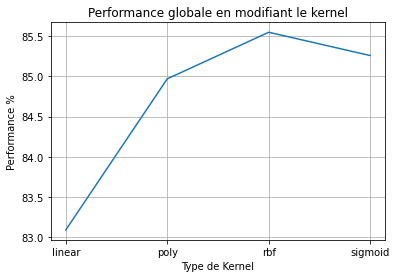

In [247]:
# Les paramètres
K=['linear','poly','rbf','sigmoid']

# Les résultats
AccuracyTAB=[]

# Test du classifieur en modifiant les Kernels
for i in range(len(K)):
    model = SklearnClassifier(SVC(kernel = K[i]))
    model.train(training)
    accuracy = nltk.classify.accuracy(model, testing)*100
    AccuracyTAB.append(round(accuracy,2))
    
# Affichage des courbes
plt.grid(True)
plt.plot(K,AccuracyTAB)
plt.title("Performance globale en modifiant le kernel")
plt.xlabel("Type de Kernel")
plt.ylabel("Performance %")
plt.show()

Le graphe permet de mettre en évidence le choix du meilleur hyperparamètre "kernel" pour l'algorithme de classification SVC dans ce cas d'utilisation. Il existe d'autres hyperparamètres mais nous n'allons les modifier.

Essayons de faire de même avec plusieurs avec d'autres algorithmes de classification

#### 1.b) Test du classifieur DecisionTreeClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [248]:
model = SklearnClassifier(DecisionTreeClassifier())
# On entraine le model
model.train(training)

# On test le classifier en utilisant l'échantillon "testing"
accuracy = nltk.classify.accuracy(model, testing)*100
accuracy = (round(accuracy,2))
print ("La précision de classification est de "+str(accuracy)+"%")

La précision de classification est de 76.01%


#### 1.c) Test du classifieur KNN (KNeighborsClassifier)
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

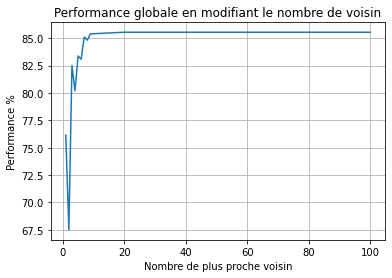

In [249]:
# Les paramètres
N=[1,2,3,4,5,6,7,8,9, 20, 50, 100]

# Les résultats
AccuracyTAB=[]

# Test du classifieur en modifiant le nombre de voisin
for i in range(len(N)):
    model = SklearnClassifier(KNeighborsClassifier(n_neighbors= N[i]))
    model.train(training)
    accuracy = nltk.classify.accuracy(model, testing)*100
    AccuracyTAB.append(round(accuracy,2))
    
# Affichage des courbes
plt.grid(True)
plt.plot(N,AccuracyTAB)
plt.title("Performance globale en modifiant le nombre de voisin")
plt.xlabel("Nombre de plus proche voisin")
plt.ylabel("Performance %")
plt.show()

#### 1.d) Test du classifieur RandomForestClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

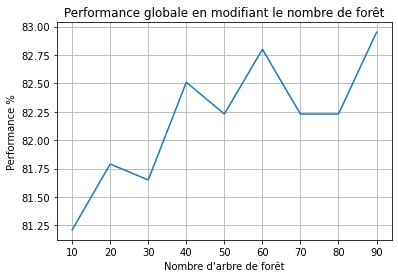

In [250]:
# Les paramètres
E=np.arange(10, 100, 10)

# Les résultats
AccuracyTAB=[]

# Test du classifieur en modifiant le nombre de forêt
for i in range(len(E)):
    model = SklearnClassifier(RandomForestClassifier(n_estimators=E[i]))
    model.train(training)
    accuracy = nltk.classify.accuracy(model, testing)*100
    AccuracyTAB.append(round(accuracy,2))
    
# Affichage des courbes
plt.grid(True)
plt.plot(E,AccuracyTAB)
plt.title("Performance globale en modifiant le nombre de forêt")
plt.xlabel("Nombre d'arbre de forêt")
plt.ylabel("Performance %")
plt.show()

#### 1.e) Test du classifieur LogistiqueRegression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

/Users/jeremy-laurent/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/jeremy-laurent/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


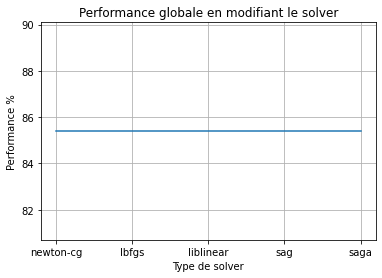

In [251]:
# Les paramètres
M=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Les résultats
AccuracyTAB=[]

# Test du classifieur en modifiant le solver
for i in range(len(M)):
    model = SklearnClassifier(LogisticRegression(solver=M[i]))
    model.train(training)
    accuracy = nltk.classify.accuracy(model, testing)*100
    AccuracyTAB.append(round(accuracy,2))
    
# Affichage des courbes
plt.grid(True)
plt.plot(M,AccuracyTAB)
plt.title("Performance globale en modifiant le solver")
plt.xlabel("Type de solver")
plt.ylabel("Performance %")
plt.show()

#### 1.f) Test du classifieur Naive_bayes.MultinomialNB
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

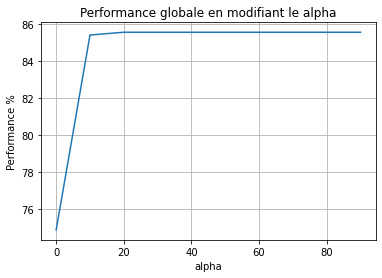

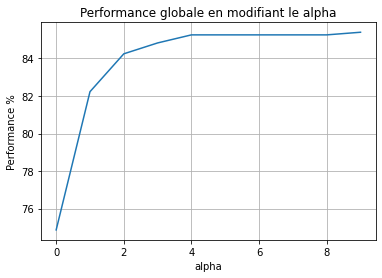

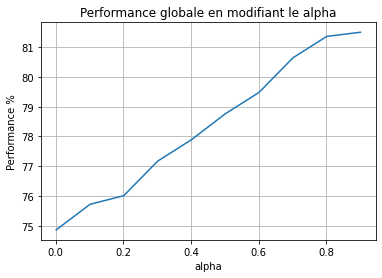

In [252]:
# Les paramètres
A=np.arange(0.001, 100, 10)
B=np.arange(0.001, 10, 1)
C=np.arange(0.001, 1, 0.1)

# Les résultats
AccuracyTAB=[]
AccuracyTAB2=[]
AccuracyTAB3=[]

# Test du classifieur en modifiant le alpha
for i in range(len(A)):
    model = SklearnClassifier(MultinomialNB(alpha=A[i]))
    model.train(training)
    accuracy = nltk.classify.accuracy(model, testing)*100
    AccuracyTAB.append(round(accuracy,2))
    
for i in range(len(B)):
    model = SklearnClassifier(MultinomialNB(alpha=B[i]))
    model.train(training)
    accuracy = nltk.classify.accuracy(model, testing)*100
    AccuracyTAB2.append(round(accuracy,2))
    
for i in range(len(C)):
    model = SklearnClassifier(MultinomialNB(alpha=C[i]))
    model.train(training)
    accuracy = nltk.classify.accuracy(model, testing)*100
    AccuracyTAB3.append(round(accuracy,2))
    
# Affichage des courbes
plt.grid(True)
plt.plot(A,AccuracyTAB)
plt.title("Performance globale en modifiant le alpha")
plt.xlabel("alpha")
plt.ylabel("Performance %")
plt.show()

plt.grid(True)
plt.plot(B,AccuracyTAB2)
plt.title("Performance globale en modifiant le alpha")
plt.xlabel("alpha")
plt.ylabel("Performance %")
plt.show()

plt.grid(True)
plt.plot(C,AccuracyTAB3)
plt.title("Performance globale en modifiant le alpha")
plt.xlabel("alpha")
plt.ylabel("Performance %")
plt.show()

### 2. Génération d'un Meta-Classifieur avec Scikit-Learn 
On adopte le principe des méthodes ensemblistes: c'est à dire utiliser des classifieurs différents (qui ne classent pas de la même manière) pour obtenir de meilleurs résultats. 

Nous avons déterminé dans la précédente partie des hyperparamètres qui améliore la performance global de chaque algorithme de classfication. Nous allons réaliser deux méta_classifieurs:
- meta_modèle normal: qui conservera les hyperparamètres par défaut, puis réalisation du vote entre les classifieurs.
- méta_modèle_optimisé: qui aura les hyperparamètres optimisé selon les résultats précédents.

#### 2.a) Meta_modèle sans optimisation

In [253]:
# Modèle individuels
KNC=KNeighborsClassifier()
DTC=DecisionTreeClassifier()
RFC=RandomForestClassifier()
LG=LogisticRegression()
SGDC=SGDClassifier()
M=MultinomialNB()
SC=SVC()

# Construction du meta-modèle
meta_model = SklearnClassifier(VotingClassifier(estimators=[('k1',KNC),('k2',DTC),('k3',RFC),('k4',LG),('k5',SGDC),('k6',M),('k7',SC)],voting="hard"))
meta_model.train(training_n3)
accuracy = nltk.classify.accuracy(meta_model, testing)*100
accuracy = (round(accuracy,3))
print("Précision de meta_classifieur: {}".format(accuracy)+"%")

Précision de meta_classifieur: 84.393%


#### 2.b) Meta_Modèle avec optimisation

In [254]:
# Modèle individuels optimisés
KNC=KNeighborsClassifier(n_neighbors=50)
DTC=DecisionTreeClassifier()
RFC=RandomForestClassifier(n_estimators=100)
LG=LogisticRegression(solver='newton-cg')
SGDC=SGDClassifier(max_iter = 1)
M=MultinomialNB(alpha=100)
SC=SVC(kernel = 'linear')

# Construction du meta-modèle
meta_model2 = SklearnClassifier(VotingClassifier(estimators=[('k1',KNC),('k2',DTC),('k3',RFC),('k4',LG),('k5',SGDC),('k6',M),('k7',SC)],voting="hard"))
meta_model2.train(training_n2)
accuracy2 = nltk.classify.accuracy(meta_model2, testing)*100
accuracy2 = (round(accuracy2,3))
print("Précision de meta_classifieur optimisé: {}".format(accuracy2)+"%")

/Users/jeremy-laurent/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Précision de meta_classifieur optimisé: 84.827%


#### 2.c) Diagramme de comparaison

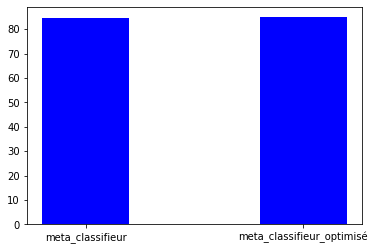

In [255]:
#Diagramme de comparaison
fig = plt.figure()

x = ['meta_classifieur','meta_classifieur_optimisé']
height = [accuracy,accuracy2]
width = 0.4 # modifier la largeur des bâtons
plt.bar(x, height, width, color='b' )
plt.show()

### 3) Test de l'algorithme d'apprentissage

#### 3.a) Prédiction du dataset testing

Nous allons à présent tester l'algorithme sur le jeu de données testing (différents de la partie d'apprentissage)

In [256]:
#On dézipe testing pour séparer les labels et les features
txt_features, labels = zip(*testing)

prediction = meta_model2.classify_many(txt_features)

### 4) Explication des résultats

#### 4.a) Matrice de confusion

##### Explication du tableau de résultats
print("precision = À quel point les prédictions positives sont précises")
print("TP/(TP+FP)\n")

print("recall = Couverture des observations vraiment positives")
print("TP/(TP+FN)\n")

print("F1_score = Indicateur hybride utilisé pour les classes non-balancées")
print("2TP/(2TP+FP+FN)\n")

# affichage des résultats
erreur= round((100-accuracy),3)
print("L'erreur est de: {}".format(erreur)+" %\n")
print(classification_report(labels, prediction))

pd.DataFrame(
    confusion_matrix(labels, prediction),
    index = [['En réalité', 'En réalité'], ['disliked', 'Liked']],
    columns = [['Ce qui été prédit', 'Ce qui été prédit'], ['disliked', 'Liked']])

#### Courbe ROC

La courbe ROC représente le taux de True Positives en fonction de taux de False Positives et obtenue en faisant varier le seuil. 

cf: https://stanford.edu/~shervine/l/fr/teaching/cs-229/pense-bete-machine-learning-petites-astuces

tuto traçage de la courbe: https://datamize.wordpress.com/2015/01/24/how-to-plot-a-roc-curve-in-scikit-learn/

Ces indicateurs sont résumés dans le tableau suivant :


|        Indicatieur          |       Formule         |       Equivalent      |
|-----------------------------|-----------------------|-----------------------|
|   True Positive Rate TPR    |    $(TP)/(TP+FN)$     |   Recall, sensitivity |
|   False Positive Rate FPR   |    $(FP)/(TN+FP)$     |      1-specificity    |



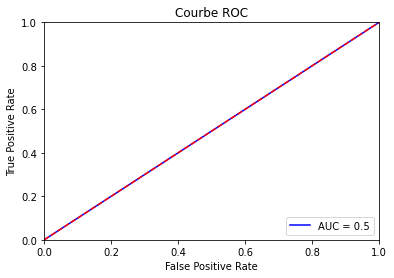

In [258]:
# Importation bibliothèques
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

# Transformation de la liste en tableau
labelsTAB = np.asarray(labels)

# Calcul du FPR et du TPR
false_positive_rate, true_positive_rate, thresholds = roc_curve(labelsTAB, prediction)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Affichage de la courbe
plt.title('Courbe ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.1f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## C. Conclusion

Ce classifieur ne fontionne pas très bien: 2 choses le prouve:
 - La matrice de confusion démontre une mauvaise répartition des échantillions de test de training (le programme à du mal à reconnaitre les dislikes)
 - La courbe ROC possède une air nulle, ce qui veut dire que notre classifieur ne sait pas vraiment classer les descriptions (il ne se trompe pas tout le temps --> aire négative, il classe parfaitement --> aire positive)
 
Cela est principalement dû au fait que les likes et les dislikes de l'utilisateur, étant générés aléatoirement, ne sont pas cohérant. Néanmois si ont fait liké à notre utilisateur beaucoup plus que dislike, notre classifieur aura une performance bien meilleur.